In [63]:
import pandas as pd
from __future__ import division
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [64]:
source_folder = 'C:\\Users\\EMBA\\Documents\\Technical_Training\\Machine Learning - Stock Market trading\\Yes Bank\\Data\\Featurized\\'
target_folder = 'C:\\Users\\EMBA\\Documents\\Technical_Training\\Machine Learning - Stock Market trading\\Yes Bank\\Model\\'
#file_name = 'Consolidated_data_set.csv'
file_name = 'YESBANK.csv'
model_name ='Comprehensive_model.sav'
source_file_path = source_folder +  file_name
target_file_path = target_folder + model_name
stock_data = pd.read_csv(source_file_path)

In [65]:
stock_data = stock_data.replace([np.inf, -np.inf], np.nan)

In [66]:
stock_data.fillna(0,inplace=True)

In [67]:
stock_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Stock,% Change,...,DBC_Max_200,DBC_Min_200,DBC_Mean_200,DBCV_Max_200,DBCV_Min_200,DBCV_Mean_200,Avg_Gain_200,Avg_Loss_200,RS_200,Add_RSI_200
0,0,7/12/2005,13.18,14.00,12.00,12.17,8.089035,244941515.0,YESBANK.NS,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7/13/2005,12.20,12.60,11.49,11.74,7.803226,64111620.0,YESBANK.NS,-3.533279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7/14/2005,12.00,12.00,11.40,11.45,7.610473,16282865.0,YESBANK.NS,-2.470187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7/15/2005,11.25,12.89,11.25,12.37,8.221969,75448030.0,YESBANK.NS,8.034934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,7/18/2005,12.54,13.14,12.50,12.82,8.521070,75684775.0,YESBANK.NS,3.637833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
attr_cols = (stock_data.columns).tolist()

In [69]:
attr_cols

['Unnamed: 0',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Stock',
 '% Change',
 '% V_Change',
 '% Change Open',
 'Add_V_Spike',
 'Add_CTrend',
 'Add_OTrend',
 'Gain',
 'Loss',
 'RB_Mean_10',
 'RB_V_Mean_10',
 'Roll_C_10',
 'Roll_VC_10',
 'DF_C_10',
 'DF_VC_10',
 'DF_Signal_Buy_10',
 'DF_Signal_Sell_10',
 'DF_V_Signal_10',
 'DB_Max_10',
 'DB_Min_10',
 'DB_VMax_10',
 'DB_VMin_10',
 'DBC_Max_10',
 'DBC_Min_10',
 'DBC_Mean_10',
 'DBCV_Max_10',
 'DBCV_Min_10',
 'DBCV_Mean_10',
 'Avg_Gain_10',
 'Avg_Loss_10',
 'RS_10',
 'Add_RSI_10',
 'RB_Mean_15',
 'RB_V_Mean_15',
 'Roll_C_15',
 'Roll_VC_15',
 'DF_C_15',
 'DF_VC_15',
 'DF_Signal_Buy_15',
 'DF_Signal_Sell_15',
 'DF_V_Signal_15',
 'DB_Max_15',
 'DB_Min_15',
 'DB_VMax_15',
 'DB_VMin_15',
 'DBC_Max_15',
 'DBC_Min_15',
 'DBC_Mean_15',
 'DBCV_Max_15',
 'DBCV_Min_15',
 'DBCV_Mean_15',
 'Avg_Gain_15',
 'Avg_Loss_15',
 'RS_15',
 'Add_RSI_15',
 'RB_Mean_20',
 'RB_V_Mean_20',
 'Roll_C_20',
 'Roll_VC_20',
 'DF_C_20',
 'DF_V

In [70]:
feature_cols = []
signal_cols = []
for i in attr_cols:
    attr_list=[]
    attr_list = i.split('_')
    if 'RBC' in attr_list or 'DBC' in attr_list or 'RBCV' in attr_list or 'DBCV' in attr_list  or 'Add' in attr_list:
        feature_cols.append(i)
    if 'Signal' in attr_list:
        signal_cols.append(i)

In [71]:
target = stock_data['DF_Signal_Buy_200']
target = target[200:]

In [72]:
#features = stock_data[['% Change', '% V_Change', 
#        'Roll_Change_30', 'Roll_VChange_30', 'DB_CMax_30', 'DB_CMin_30', 'DB_CMean_30', 'DB_CVMax_30', 'DB_CVMin_30', 'DB_CVMean_30', 
#        'Roll_Change_50', 'Roll_VChange_50', 'DB_CMax_50', 'DB_CMin_50', 'DB_CMean_50', 'DB_CVMax_50', 'DB_CVMin_50', 'DB_CVMean_50', 
#       'Roll_Change_150', 'Roll_VChange_150', 'DB_CMax_150', 'DB_CMin_150', 'DB_CMean_150', 'DB_CVMax_150', 'DB_CVMin_150', 'DB_CVMean_150',
#       'Roll_Change_200', 'Roll_VChange_200', 'DB_CMax_200', 'DB_CMin_200', 'DB_CMean_200', 'DB_CVMax_200', 'DB_CVMin_200', 'DB_CVMean_200']]

In [73]:
#features = stock_data[['% Change',  
#        'Roll_Change_30', 'DB_CMax_30', 'DB_CMin_30', 'DB_CMean_30', 'DB_CVMean_30', 
#        'Roll_Change_50', 'DB_CMax_50', 'DB_CMin_50', 'DB_CMean_50',  'DB_CVMean_50',
#        'Roll_Change_150', 'DB_CMax_150', 'DB_CMin_150', 'DB_CMean_150', 'DB_CVMean_150',
#        'Roll_Change_200', 'DB_CMax_200', 'DB_CMin_200', 'DB_CMean_200', 'DB_CVMean_200']]

In [74]:
features = stock_data[feature_cols]
features = features[200:]
features.iloc[0]

Add_V_Spike          0.000000
Add_CTrend           1.000000
Add_OTrend           1.000000
DBC_Max_10           0.000000
DBC_Min_10          16.151755
DBC_Mean_10         -5.006997
DBCV_Max_10        356.791705
DBCV_Min_10          0.000000
DBCV_Mean_10       128.874057
Add_RSI_10         106.708014
DBC_Max_15           0.000000
DBC_Min_15          16.151755
DBC_Mean_15         -6.735105
DBCV_Max_15        356.791705
DBCV_Min_15         14.299115
DBCV_Mean_15        83.493958
Add_RSI_15         200.760289
DBC_Max_20           0.000000
DBC_Min_20          16.151755
DBC_Mean_20         -7.400839
DBCV_Max_20        356.791705
DBCV_Min_20         14.299115
DBCV_Mean_20        67.300529
Add_RSI_20         308.137155
DBC_Max_25           0.000000
DBC_Min_25          16.151755
DBC_Mean_25         -7.038730
DBCV_Max_25        356.791705
DBCV_Min_25         14.299115
DBCV_Mean_25        56.766010
Add_RSI_25         346.640321
DBC_Max_30           0.000000
DBC_Min_30          16.467391
DBC_Mean_3

In [75]:
features.head()

,Add_V_Spike,Add_CTrend,Add_OTrend,DBC_Max_10,DBC_Min_10,DBC_Mean_10,DBCV_Max_10,DBCV_Min_10,DBCV_Mean_10,Add_RSI_10,...,DBCV_Min_150,DBCV_Mean_150,Add_RSI_150,DBC_Max_200,DBC_Min_200,DBC_Mean_200,DBCV_Max_200,DBCV_Min_200,DBCV_Mean_200,Add_RSI_200
200,0,1,1,0.000000,16.151755,-5.006997,356.791705,0.000000,128.874057,106.708014,...,2.696121,150.967277,240.754774,0.000000,87.161572,-29.495800,15584.004778,0.416457,503.594201,304.806110
201,0,0,0,2.096236,8.587688,-1.805620,811.618754,0.000000,306.760382,123.278477,...,0.636700,395.105294,259.947675,2.096236,83.318777,-27.797523,31200.552839,0.098348,1040.058551,297.673074
202,0,1,1,1.228153,6.596168,-1.771373,514.129127,5.313723,156.723718,133.060396,...,1.638611,230.269595,264.128634,1.228153,72.394137,-28.181861,20986.206402,0.253109,657.394856,284.081844
203,0,0,0,3.777240,3.977840,1.041164,224.916597,16.043408,48.791912,251.786280,...,2.888870,130.882126,291.371447,3.777240,68.159609,-26.172881,14884.295891,0.446230,402.082263,322.897269
204,0,0,0,6.563893,0.000000,3.878664,203.107219,18.257905,23.273520,619.386814,...,3.199741,113.957221,299.293688,6.563893,63.762223,-24.009203,13878.504965,0.494249,334.594773,356.115078


In [76]:
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=42)

In [77]:
train_target.isnull().sum()

0

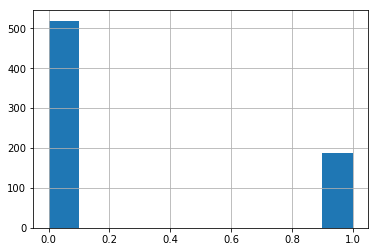

In [78]:
test_target.hist()
plt.show()

In [79]:
train_data[0:5]

,Add_V_Spike,Add_CTrend,Add_OTrend,DBC_Max_10,DBC_Min_10,DBC_Mean_10,DBCV_Max_10,DBCV_Min_10,DBCV_Mean_10,Add_RSI_10,...,DBCV_Min_150,DBCV_Mean_150,Add_RSI_150,DBC_Max_200,DBC_Min_200,DBC_Mean_200,DBCV_Max_200,DBCV_Min_200,DBCV_Mean_200,Add_RSI_200
1129,0,1,1,3.576595,3.976782,-0.975810,127.559077,11.313635,41.808036,-1920.492374,...,8.969861,137.535421,157.456364,335.187108,213.683521,-17.886912,2163.472764,4.417990,193.634169,147.146938
638,0,0,1,3.660499,6.878764,0.102574,0.000000,71.491916,-37.061459,129.019909,...,26.857598,-23.357530,555.789381,6.898634,69.058147,-19.413216,223.816695,27.499221,-29.296674,414.478574
1198,0,1,1,0.000000,11.522078,-6.306651,13.130450,66.118033,-38.559127,251.779609,...,36.290560,-33.166813,683.262909,265.514846,97.361206,-15.908144,191.542049,34.300369,-31.926979,167.039107
1585,0,0,0,16.192908,0.000000,8.882576,57.193564,19.036555,15.403354,-20.533339,...,12.699887,-0.789240,-1340.296935,30.758674,3.657791,14.505199,356.546162,14.908836,1.130401,18072.223574
2607,0,1,0,6.760924,1.959551,3.565788,148.205276,12.128285,15.923321,-423.538982,...,19.857657,-19.281336,-970.318178,21.120190,15.682071,5.322155,290.810684,19.857657,-24.634452,-2367.667069


In [80]:
from sklearn.preprocessing import normalize
train_data = normalize(train_data)
#train_target = normalize(train_target)
test_data = normalize(test_data)
#test_target = normalize(test_target)

In [81]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
model = sk.linear_model.LogisticRegression(penalty='l1',max_iter=1000,tol=1e-12)
#model.fit(train_data.as_matrix(),train_target.as_matrix())
model.fit(train_data,train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-12,
          verbose=0, warm_start=False)

In [82]:
model.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.06161337,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -0.50621278,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.36729974,
          0.        ,   0.        ,   0.        ,  -1.66735311,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  -1.99128312,   0.        ,
         16.18911273,   0.33394148,  -3.74449621,   0.        ,
          0.        ,  -4.14573895,   0.        ,   0.        ,
          0.36293811,   0.        ,  -2.1196932 ,   0.        ,
          1.69475405,   0.        ,   0.        ,   0.63647185,
         -4.95498763,   0.        ,   0.        ,   2.53371793,
          0.        , -20.3891397 ,   0.22373447]])

In [83]:
features_columns = features.columns
features_columns

Index(['Add_V_Spike', 'Add_CTrend', 'Add_OTrend', 'DBC_Max_10', 'DBC_Min_10',
       'DBC_Mean_10', 'DBCV_Max_10', 'DBCV_Min_10', 'DBCV_Mean_10',
       'Add_RSI_10', 'DBC_Max_15', 'DBC_Min_15', 'DBC_Mean_15', 'DBCV_Max_15',
       'DBCV_Min_15', 'DBCV_Mean_15', 'Add_RSI_15', 'DBC_Max_20', 'DBC_Min_20',
       'DBC_Mean_20', 'DBCV_Max_20', 'DBCV_Min_20', 'DBCV_Mean_20',
       'Add_RSI_20', 'DBC_Max_25', 'DBC_Min_25', 'DBC_Mean_25', 'DBCV_Max_25',
       'DBCV_Min_25', 'DBCV_Mean_25', 'Add_RSI_25', 'DBC_Max_30', 'DBC_Min_30',
       'DBC_Mean_30', 'DBCV_Max_30', 'DBCV_Min_30', 'DBCV_Mean_30',
       'Add_RSI_30', 'DBC_Max_50', 'DBC_Min_50', 'DBC_Mean_50', 'DBCV_Max_50',
       'DBCV_Min_50', 'DBCV_Mean_50', 'Add_RSI_50', 'DBC_Max_150',
       'DBC_Min_150', 'DBC_Mean_150', 'DBCV_Max_150', 'DBCV_Min_150',
       'DBCV_Mean_150', 'Add_RSI_150', 'DBC_Max_200', 'DBC_Min_200',
       'DBC_Mean_200', 'DBCV_Max_200', 'DBCV_Min_200', 'DBCV_Mean_200',
       'Add_RSI_200'],
      dtype='object'

In [84]:
map_coeff_columns = dict()
for i in range(len(features_columns)):
    map_coeff_columns[features_columns[i]] = model.coef_[0][i]
print (map_coeff_columns)

{'Add_V_Spike': 0.0, 'Add_CTrend': 0.0, 'Add_OTrend': 0.0, 'DBC_Max_10': 0.0, 'DBC_Min_10': 0.0, 'DBC_Mean_10': 0.0, 'DBCV_Max_10': 0.0, 'DBCV_Min_10': 0.0, 'DBCV_Mean_10': 0.0, 'Add_RSI_10': 0.061613368369431001, 'DBC_Max_15': 0.0, 'DBC_Min_15': 0.0, 'DBC_Mean_15': 0.0, 'DBCV_Max_15': 0.0, 'DBCV_Min_15': 0.0, 'DBCV_Mean_15': 0.0, 'Add_RSI_15': -0.5062127781071738, 'DBC_Max_20': 0.0, 'DBC_Min_20': 0.0, 'DBC_Mean_20': 0.0, 'DBCV_Max_20': 0.0, 'DBCV_Min_20': 0.0, 'DBCV_Mean_20': 0.0, 'Add_RSI_20': 0.36729974357115314, 'DBC_Max_25': 0.0, 'DBC_Min_25': 0.0, 'DBC_Mean_25': 0.0, 'DBCV_Max_25': -1.6673531072420198, 'DBCV_Min_25': 0.0, 'DBCV_Mean_25': 0.0, 'Add_RSI_25': 0.0, 'DBC_Max_30': 0.0, 'DBC_Min_30': 0.0, 'DBC_Mean_30': 0.0, 'DBCV_Max_30': -1.9912831195507139, 'DBCV_Min_30': 0.0, 'DBCV_Mean_30': 16.189112725564037, 'Add_RSI_30': 0.33394148369338789, 'DBC_Max_50': -3.7444962143761091, 'DBC_Min_50': 0.0, 'DBC_Mean_50': 0.0, 'DBCV_Max_50': -4.1457389476079713, 'DBCV_Min_50': 0.0, 'DBCV_Mea

In [85]:
import operator
sorted_map_coeff_columns = sorted(map_coeff_columns.items(),key=operator.itemgetter(1),reverse=True)
sorted_map_coeff_columns

[('DBCV_Mean_30', 16.189112725564037),
 ('DBCV_Max_200', 2.5337179333617796),
 ('DBCV_Max_150', 1.6947540473694314),
 ('Add_RSI_150', 0.63647184682773894),
 ('Add_RSI_20', 0.36729974357115314),
 ('Add_RSI_50', 0.36293811409702925),
 ('Add_RSI_30', 0.33394148369338789),
 ('Add_RSI_200', 0.22373447465518481),
 ('Add_RSI_10', 0.061613368369431001),
 ('Add_V_Spike', 0.0),
 ('Add_CTrend', 0.0),
 ('Add_OTrend', 0.0),
 ('DBC_Max_10', 0.0),
 ('DBC_Min_10', 0.0),
 ('DBC_Mean_10', 0.0),
 ('DBCV_Max_10', 0.0),
 ('DBCV_Min_10', 0.0),
 ('DBCV_Mean_10', 0.0),
 ('DBC_Max_15', 0.0),
 ('DBC_Min_15', 0.0),
 ('DBC_Mean_15', 0.0),
 ('DBCV_Max_15', 0.0),
 ('DBCV_Min_15', 0.0),
 ('DBCV_Mean_15', 0.0),
 ('DBC_Max_20', 0.0),
 ('DBC_Min_20', 0.0),
 ('DBC_Mean_20', 0.0),
 ('DBCV_Max_20', 0.0),
 ('DBCV_Min_20', 0.0),
 ('DBCV_Mean_20', 0.0),
 ('DBC_Max_25', 0.0),
 ('DBC_Min_25', 0.0),
 ('DBC_Mean_25', 0.0),
 ('DBCV_Min_25', 0.0),
 ('DBCV_Mean_25', 0.0),
 ('Add_RSI_25', 0.0),
 ('DBC_Max_30', 0.0),
 ('DBC_Min_30', 

In [86]:
from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(y_true=test_target.as_matrix(), y_pred=model.predict(test_data))
accuracy = accuracy_score(y_true=test_target, y_pred=model.predict(test_data))
print ("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.776520509194


In [87]:
baseline = len(test_target[test_target == 0])/len(test_target)
print ("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.7340876944837341


In [88]:
predicted_signal = model.predict(test_data)

In [89]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_target.as_matrix(),
                        y_pred=model.predict(test_data),
                        labels=model.classes_)    # use the same order of class as the LR model.
print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   500
      0       |        1        |    19
      1       |        0        |   139
      1       |        1        |    49


In [90]:
#precision = model.evaluate(test_data, metric='precision')['precision']
#print "Precision on test data: %s" % precision

#from sklearn.metrics import precision_score
#precision = precision_score(y_true=test_target.as_matrix(), 
#                            y_pred=model.predict(test_data))
#print ("Precision on test data: %s" % precision)

In [91]:
#recall = model.evaluate(test_data, metric='recall')['recall']
#print "Recall on test data: %s" % recall

#from sklearn.metrics import recall_score
#recall = recall_score(y_true=test_target.as_matrix(),
#                      y_pred=model.predict(test_data))
#print ("Recall on test data: %s" % recall)

In [92]:
model.predict_log_proba(train_data)

array([[-0.22545347, -1.60025121],
       [-0.41414301, -1.08147918],
       [-0.24738782, -1.51794325],
       ..., 
       [-0.505374  , -0.9245243 ],
       [-0.24039567, -1.54326018],
       [-0.15084743, -1.9659621 ]])

In [93]:
model.predict_proba(test_data)

array([[ 0.6719639 ,  0.3280361 ],
       [ 0.87077648,  0.12922352],
       [ 0.71450688,  0.28549312],
       ..., 
       [ 0.46037488,  0.53962512],
       [ 0.71690673,  0.28309327],
       [ 0.85693309,  0.14306691]])

In [94]:
def apply_threshold(probabilities, threshold, predicted_signal):
    ### YOUR CODE GOES HERE
    # +1 if >= threshold and -1 otherwise.
    prediction = pd.Series(len(probabilities))
    for i in range(len(probabilities)):
        if probabilities[i] > threshold:
            prediction[i] = predicted_signal[i]
        #elif predicted_signal[i] == 0:
        #    prediction[i] = 0
        #elif predicted_signal[i] == -1:
        #    prediction[i] = -1
        else:
            prediction[i] = 2 # unless strong signal, take no position (buy/sell)
    return prediction

In [95]:
probabilities = model.predict_proba(test_data)[:,1]
predictions_with_default_threshold = apply_threshold(probabilities, 0.5, predicted_signal)
predictions_with_high_threshold = apply_threshold(probabilities, 0.8, predicted_signal)

In [96]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_target.as_matrix(),
                        y_pred=predictions_with_high_threshold,
                        labels=model.classes_)    # use the same order of class as the LR model.
print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |     0
      0       |        1        |     0
      1       |        0        |     0
      1       |        1        |     0


In [97]:
type(probabilities)

numpy.ndarray

In [98]:
prob_df = pd.DataFrame(probabilities)

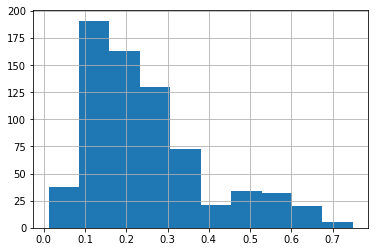

In [99]:
prob_df[0].hist()
plt.show()

In [100]:
prob_df.describe()

,0
count,707.000000
mean,0.249936
std,0.147832
min,0.011786
25%,0.140546
50%,0.207574
75%,0.311994
max,0.748776


In [101]:
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets

# Use label_binarize to be multi-label like settings
Y = label_binarize(target, classes=[-1, 0, 1])
n_classes = Y.shape[1]
X = features

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=42)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=42))
model_OneVsRest = classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

C:\Users\EMBA\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [102]:
y_score

array([[  0.        ,  -0.31256435,   1.51506924],
       [  0.        ,   2.01526945,   2.74175014],
       [  0.        ,   1.33877602,  -1.12090351],
       ..., 
       [  0.        ,  -0.54118246,   0.06264151],
       [  0.        , -25.81114739, -12.65233521],
       [  0.        ,   0.65410742,  -1.48509999]])

In [103]:
y_pred

array([[0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]])

In [104]:
from sklearn.metrics import average_precision_score
#from sklearn.metrics import average_recall_score
average_precision = average_precision_score(Y_test, y_score)
#average_recall = average_recall_score(Y_test,y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: nan


C:\Users\EMBA\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:415: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\EMBA\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


In [105]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'

      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.62


C:\Users\EMBA\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:415: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\EMBA\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


In [106]:
y_score

array([[  0.        ,  -0.31256435,   1.51506924],
       [  0.        ,   2.01526945,   2.74175014],
       [  0.        ,   1.33877602,  -1.12090351],
       ..., 
       [  0.        ,  -0.54118246,   0.06264151],
       [  0.        , -25.81114739, -12.65233521],
       [  0.        ,   0.65410742,  -1.48509999]])

In [107]:
Y_test.shape

(707, 3)

In [108]:
Y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ..., 
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [109]:
match = 0
minus_1 = 0
zero = 0
plus_1 = 0
unknown = 0
for i in range(3):
    for x in range(len(Y_test)):
        if Y_test[x][i] == y_pred[x][i]:
            match = match + 1
        elif y_pred[x][0] == 1:
            minus_1 = minus_1 + 1
        elif y_pred[x][1] == 1:
            zero = zero + 1
        elif y_pred[x][2] == 1:
            plus_1 = plus_1 + 1
        else:
            unknown = unknown + 1
    print (str(i) +' matched ' +str(match))
    print (str(minus_1) +' ' +str(zero) +' ' +str(plus_1) +' ' +str(unknown))
    match = 0
    minus_1 = 0
    zero = 0
    plus_1 = 0
    unknown = 0
print ('total rows ' +str(len(Y_test))) 

0 matched 707
0 0 0 0
1 matched 452
0 48 26 181
2 matched 531
0 59 26 91
total rows 707


In [110]:
import pickle

In [111]:
# save the model to disk
pickle.dump(model, open(target_file_path, 'wb'))

In [112]:
#model_read = pickle.load(open(target_file_path, 'rb'))

In [113]:
#model_read

In [114]:
model_name ='Yesbank_model_OneVsRest_2017-10-26.sav'
target_file_path = target_folder + model_name
pickle.dump(model_OneVsRest, open(target_file_path, 'wb'))

In [115]:
a = y_pred[0]

In [116]:
no_pred = 0
for i in range(len(y_pred)):
    if y_pred[i].sum() > 1:
        no_pred += 1
        print ('no pred ' +str(y_pred[i]))
print ('no pred ' +str(no_pred))

no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred [0 1 1]
no pred 15
